# **Project: iOT data analysis**
### Project detail:
In this Dataset, we have the temperature readings from IoT devices installed outside and inside of an anonymous room. Because the device was in the testing phase, it was uninstalled or shut off several times during the entire reading period, which caused some outliers and missing-values.


### Dataset details:


1. id : unique IDs for each reading
2. room_id/id : room id in which device was installed(currently 'admin room' only for example purpose).
3. noted_date : date and time of reading
4. temp : temperature readings
5. out/in : whether reading was taken from device installed inside or outside of room





In [39]:
import pandas as pd
from google.colab import files
uploaded = files.upload()

Saving temp-data.csv to temp-data (2).csv


In [40]:
import io
df = pd.read_csv(io.BytesIO(uploaded['temp-data.csv']))

In [41]:
df.head()

,id,room_id/id,noted_date,temp,out/in
0,__export__.temp_log_196134_bd201015,Room Admin,08-12-2018 09:30,29,In
1,__export__.temp_log_196131_7bca51bc,Room Admin,08-12-2018 09:30,29,In
2,__export__.temp_log_196127_522915e3,Room Admin,08-12-2018 09:29,41,Out
3,__export__.temp_log_196128_be0919cf,Room Admin,08-12-2018 09:29,41,Out
4,__export__.temp_log_196126_d30b72fb,Room Admin,08-12-2018 09:29,31,In


In [42]:
df.tail()

,id,room_id/id,noted_date,temp,out/in
97601,__export__.temp_log_91076_7fbd08ca,Room Admin,28-07-2018 07:07,31,In
97602,__export__.temp_log_147733_62c03f31,Room Admin,28-07-2018 07:07,31,In
97603,__export__.temp_log_100386_84093a68,Room Admin,28-07-2018 07:06,31,In
97604,__export__.temp_log_123297_4d8e690b,Room Admin,28-07-2018 07:06,31,In
97605,__export__.temp_log_133741_32958703,Room Admin,28-07-2018 07:06,31,In


In [43]:
# checking for any duplicate rows
df.describe(include="all")

,id,room_id/id,noted_date,temp,out/in
count,97606,97606,97606,97606.000000,97606
unique,97605,1,27920,NaN,2
top,__export__.temp_log_196108_4a983c7e,Room Admin,12-09-2018 03:09,NaN,Out
freq,2,97606,65,NaN,77261
mean,NaN,NaN,NaN,35.053931,NaN
std,NaN,NaN,NaN,5.699825,NaN
min,NaN,NaN,NaN,21.000000,NaN
25%,NaN,NaN,NaN,30.000000,NaN
50%,NaN,NaN,NaN,35.000000,NaN
75%,NaN,NaN,NaN,40.000000,NaN


In [44]:
#removed the duplicate rows keeping the first one
df.drop_duplicates(keep="first", inplace=True)

In [45]:
df.describe(include="all")

,id,room_id/id,noted_date,temp,out/in
count,97605,97605,97605,97605.000000,97605
unique,97605,1,27920,NaN,2
top,__export__.temp_log_37661_a49cafea,Room Admin,12-09-2018 03:09,NaN,Out
freq,1,97605,65,NaN,77260
mean,NaN,NaN,NaN,35.053860,NaN
std,NaN,NaN,NaN,5.699811,NaN
min,NaN,NaN,NaN,21.000000,NaN
25%,NaN,NaN,NaN,30.000000,NaN
50%,NaN,NaN,NaN,35.000000,NaN
75%,NaN,NaN,NaN,40.000000,NaN


In [46]:
#checking for missing values
df.isna().sum()

id            0
room_id/id    0
noted_date    0
temp          0
out/in        0
dtype: int64

In [47]:
#printing the df
df

,id,room_id/id,noted_date,temp,out/in
0,__export__.temp_log_196134_bd201015,Room Admin,08-12-2018 09:30,29,In
1,__export__.temp_log_196131_7bca51bc,Room Admin,08-12-2018 09:30,29,In
2,__export__.temp_log_196127_522915e3,Room Admin,08-12-2018 09:29,41,Out
3,__export__.temp_log_196128_be0919cf,Room Admin,08-12-2018 09:29,41,Out
4,__export__.temp_log_196126_d30b72fb,Room Admin,08-12-2018 09:29,31,In
...,...,...,...,...,...
97601,__export__.temp_log_91076_7fbd08ca,Room Admin,28-07-2018 07:07,31,In
97602,__export__.temp_log_147733_62c03f31,Room Admin,28-07-2018 07:07,31,In
97603,__export__.temp_log_100386_84093a68,Room Admin,28-07-2018 07:06,31,In
97604,__export__.temp_log_123297_4d8e690b,Room Admin,28-07-2018 07:06,31,In


In [48]:
#seperating date and time
date = df["noted_date"].str.split(' ', n=1, expand=True)
df["date"] = date[0]
df["time"] = date[1]

In [49]:
df

,id,room_id/id,noted_date,temp,out/in,date,time
0,__export__.temp_log_196134_bd201015,Room Admin,08-12-2018 09:30,29,In,08-12-2018,09:30
1,__export__.temp_log_196131_7bca51bc,Room Admin,08-12-2018 09:30,29,In,08-12-2018,09:30
2,__export__.temp_log_196127_522915e3,Room Admin,08-12-2018 09:29,41,Out,08-12-2018,09:29
3,__export__.temp_log_196128_be0919cf,Room Admin,08-12-2018 09:29,41,Out,08-12-2018,09:29
4,__export__.temp_log_196126_d30b72fb,Room Admin,08-12-2018 09:29,31,In,08-12-2018,09:29
...,...,...,...,...,...,...,...
97601,__export__.temp_log_91076_7fbd08ca,Room Admin,28-07-2018 07:07,31,In,28-07-2018,07:07
97602,__export__.temp_log_147733_62c03f31,Room Admin,28-07-2018 07:07,31,In,28-07-2018,07:07
97603,__export__.temp_log_100386_84093a68,Room Admin,28-07-2018 07:06,31,In,28-07-2018,07:06
97604,__export__.temp_log_123297_4d8e690b,Room Admin,28-07-2018 07:06,31,In,28-07-2018,07:06


In [50]:
#extracting months from date
month = df["date"].str.split('-', n=2, expand=True)
df["month"] = month[1]

In [51]:
#changing the dtype of month from object to numeric
df["month"].apply(pd.to_numeric)

0        12
1        12
2        12
3        12
4        12
         ..
97601     7
97602     7
97603     7
97604     7
97605     7
Name: month, Length: 97605, dtype: int64

In [52]:
#deducing season based on the month
d = dict({1: 'Winter', 2: 'Spring', 3: 'Spring', 4: 'Summer', 5: 'Summer', 6: 'Summer', 7: 'Monsoon', 8: 'Monsoon', 9: 'Monsoon', 10: 'Autumn', 11: 'Autumn', 12: 'Winter' })
df["season"] = df.apply(lambda row: d[int(row["month"])], axis = 1 )

In [53]:
#printing the df
df

,id,room_id/id,noted_date,temp,out/in,date,time,month,season
0,__export__.temp_log_196134_bd201015,Room Admin,08-12-2018 09:30,29,In,08-12-2018,09:30,12,Winter
1,__export__.temp_log_196131_7bca51bc,Room Admin,08-12-2018 09:30,29,In,08-12-2018,09:30,12,Winter
2,__export__.temp_log_196127_522915e3,Room Admin,08-12-2018 09:29,41,Out,08-12-2018,09:29,12,Winter
3,__export__.temp_log_196128_be0919cf,Room Admin,08-12-2018 09:29,41,Out,08-12-2018,09:29,12,Winter
4,__export__.temp_log_196126_d30b72fb,Room Admin,08-12-2018 09:29,31,In,08-12-2018,09:29,12,Winter
...,...,...,...,...,...,...,...,...,...
97601,__export__.temp_log_91076_7fbd08ca,Room Admin,28-07-2018 07:07,31,In,28-07-2018,07:07,07,Monsoon
97602,__export__.temp_log_147733_62c03f31,Room Admin,28-07-2018 07:07,31,In,28-07-2018,07:07,07,Monsoon
97603,__export__.temp_log_100386_84093a68,Room Admin,28-07-2018 07:06,31,In,28-07-2018,07:06,07,Monsoon
97604,__export__.temp_log_123297_4d8e690b,Room Admin,28-07-2018 07:06,31,In,28-07-2018,07:06,07,Monsoon


In [54]:
#deducing day_time from time
def getTime(time):
  local_time = int(time.split(':')[0])

  if (local_time>=6 and local_time<=18):
    return 'Day'
  else:
    return 'Night'

df["day_time"] = df.apply(lambda row: getTime(row["time"]), axis=1)

In [55]:
#looking the df
df

,id,room_id/id,noted_date,temp,out/in,date,time,month,season,day_time
0,__export__.temp_log_196134_bd201015,Room Admin,08-12-2018 09:30,29,In,08-12-2018,09:30,12,Winter,Day
1,__export__.temp_log_196131_7bca51bc,Room Admin,08-12-2018 09:30,29,In,08-12-2018,09:30,12,Winter,Day
2,__export__.temp_log_196127_522915e3,Room Admin,08-12-2018 09:29,41,Out,08-12-2018,09:29,12,Winter,Day
3,__export__.temp_log_196128_be0919cf,Room Admin,08-12-2018 09:29,41,Out,08-12-2018,09:29,12,Winter,Day
4,__export__.temp_log_196126_d30b72fb,Room Admin,08-12-2018 09:29,31,In,08-12-2018,09:29,12,Winter,Day
...,...,...,...,...,...,...,...,...,...,...
97601,__export__.temp_log_91076_7fbd08ca,Room Admin,28-07-2018 07:07,31,In,28-07-2018,07:07,07,Monsoon,Day
97602,__export__.temp_log_147733_62c03f31,Room Admin,28-07-2018 07:07,31,In,28-07-2018,07:07,07,Monsoon,Day
97603,__export__.temp_log_100386_84093a68,Room Admin,28-07-2018 07:06,31,In,28-07-2018,07:06,07,Monsoon,Day
97604,__export__.temp_log_123297_4d8e690b,Room Admin,28-07-2018 07:06,31,In,28-07-2018,07:06,07,Monsoon,Day


In [56]:
#getting max temp for each season during day and night
df.groupby(['season', 'day_time']).max()

id  room_id/id  ...   time  month
season  day_time                                                   ...              
Autumn  Day        __export__.temp_log_99993_5c86dbe9  Room Admin  ...  18:59     11
        Night      __export__.temp_log_99925_94f7ac28  Room Admin  ...  23:59     11
Monsoon Day          __export__.temp_log_999_15c3052f  Room Admin  ...  18:59     09
        Night       __export__.temp_log_9999_567f615b  Room Admin  ...  23:59     09
Winter  Day       __export__.temp_log_196134_bd201015  Room Admin  ...  18:59     12
        Night     __export__.temp_log_195525_4c6f82e7  Room Admin  ...  23:59     12

[6 rows x 8 columns]

In [57]:
#getting min temp for each season during day and night
df.groupby(['season', 'day_time']).min()

id  room_id/id  ...   time  month
season  day_time                                                   ...              
Autumn  Day       __export__.temp_log_100004_ea0b9f21  Room Admin  ...  06:00     10
        Night     __export__.temp_log_100025_4cfe74e0  Room Admin  ...  00:00     10
Monsoon Day       __export__.temp_log_100009_51bd5a46  Room Admin  ...  06:00     07
        Night     __export__.temp_log_100007_e9852112  Room Admin  ...  00:00     07
Winter  Day       __export__.temp_log_172022_8bc58b91  Room Admin  ...  06:00     12
        Night     __export__.temp_log_171456_a6e6de9d  Room Admin  ...  00:00     12

[6 rows x 8 columns]

In [60]:
#trying to analyse the time more
def getHouroftheDay(time):
  local_time = int(time.split(':')[0])

  if (local_time>=0 and local_time<=3):
    return 'Late Night'
  elif (local_time>3 and local_time<=6):
    return 'Early Morning'
  elif (local_time>6 and local_time<=12):
    return 'Morning'
  elif (local_time>12 and local_time<=15):
    return 'Afternoon'
  elif (local_time>15 and local_time<=18):
    return 'Evening'
  else:
    return 'Night'

df["hour_of_the_day"] = df.apply(lambda row: getTime(row["time"]), axis=1)

In [61]:
#looking the df
df

,id,room_id/id,noted_date,temp,out/in,date,time,month,season,day_time,hour_of_the_day
0,__export__.temp_log_196134_bd201015,Room Admin,08-12-2018 09:30,29,In,08-12-2018,09:30,12,Winter,Day,Day
1,__export__.temp_log_196131_7bca51bc,Room Admin,08-12-2018 09:30,29,In,08-12-2018,09:30,12,Winter,Day,Day
2,__export__.temp_log_196127_522915e3,Room Admin,08-12-2018 09:29,41,Out,08-12-2018,09:29,12,Winter,Day,Day
3,__export__.temp_log_196128_be0919cf,Room Admin,08-12-2018 09:29,41,Out,08-12-2018,09:29,12,Winter,Day,Day
4,__export__.temp_log_196126_d30b72fb,Room Admin,08-12-2018 09:29,31,In,08-12-2018,09:29,12,Winter,Day,Day
...,...,...,...,...,...,...,...,...,...,...,...
97601,__export__.temp_log_91076_7fbd08ca,Room Admin,28-07-2018 07:07,31,In,28-07-2018,07:07,07,Monsoon,Day,Day
97602,__export__.temp_log_147733_62c03f31,Room Admin,28-07-2018 07:07,31,In,28-07-2018,07:07,07,Monsoon,Day,Day
97603,__export__.temp_log_100386_84093a68,Room Admin,28-07-2018 07:06,31,In,28-07-2018,07:06,07,Monsoon,Day,Day
97604,__export__.temp_log_123297_4d8e690b,Room Admin,28-07-2018 07:06,31,In,28-07-2018,07:06,07,Monsoon,Day,Day


In [84]:
#daily mean temp
dailyTemp = df.groupby(['date'], as_index=False).mean()

In [76]:
#daily temp df
dailyTemp

,date,temp
0,01-11-2018,40.731760
1,01-12-2018,37.379501
2,02-08-2018,32.176471
3,02-11-2018,41.193853
4,02-12-2018,37.698765
...,...,...
81,30-09-2018,47.949555
82,30-10-2018,38.940385
83,30-11-2018,38.187097
84,31-07-2018,31.953488


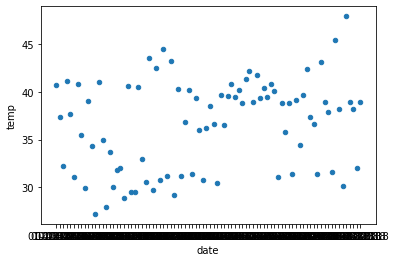

In [77]:
#daily mean temp plot
dailyTemp.plot.scatter(x='date', y='temp')

In [80]:
#monthly mean temp
monthlyTemp = df.groupby(['month'], as_index=False).mean()

In [82]:
#monthly temp df
monthlyTemp

,month,temp
0,07,31.571429
1,08,30.531013
2,09,31.056060
3,10,39.265310
4,11,38.956663
5,12,34.432795


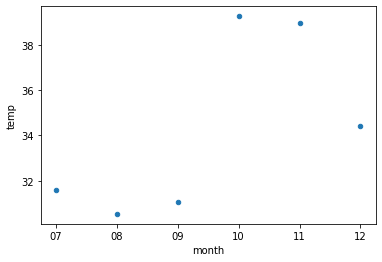

In [83]:
#monthly mean temp plot
monthlyTemp.plot.scatter(x='month', y='temp')